Modified from the genereated codes by perplexity.ai especially for visualizations!

Contents
- topological sorting
- DAG relaxation

['E', 'D', 'B', 'C', 'A']
['A', 'C', 'B', 'D', 'E']


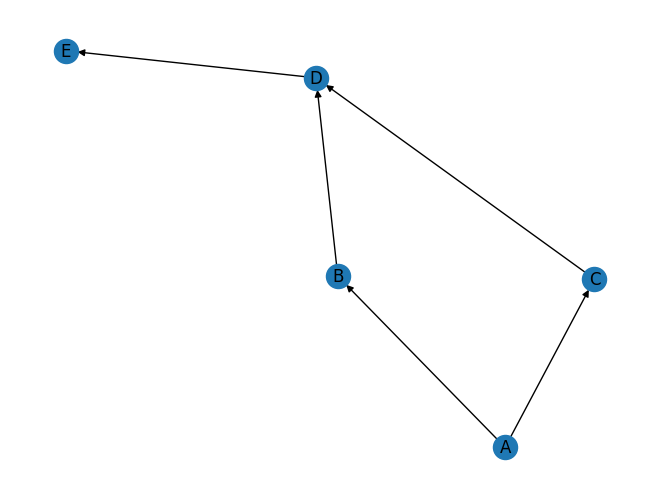

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# DAG relaxation algorithm (same as before)
def topological_sort(graph):
    visited = set()
    stack = []

    def dfs(v):
        visited.add(v)
        for neighbor in graph[v]:
            if neighbor not in visited:
                dfs(neighbor)

        stack.append(v)

    for vertex in graph:
        if vertex not in visited:
            dfs(vertex)
    
    print(stack)

    return list(reversed(stack))

# Check topological_sort with an example graph
graph = {
    'A': ['B', 'C'],
    'B': ['D'],
    'C': ['D'],
    'D': ['E'],
    'E': []
}
print(topological_sort(graph))

# visualize the graph
G = nx.DiGraph()
for node in graph:
    G.add_node(node)
    for neighbor in graph[node]:
        G.add_edge(node, neighbor)

# draw the graph with the root as A
# pos = nx.draw_planar(G)
nx.draw(G, with_labels=True)
# nx.draw(G, pos=pos, with_labels=True)
plt.show()

# DFS visiting order: A B D E C
# postorder traversal order: E D B C A
# topological order: A C B D E


['F', 'D', 'E', 'B', 'C', 'A']
['A', 'C', 'B', 'E', 'D', 'F']
['F', 'D', 'E', 'B', 'C', 'A']


/var/folders/mt/2lwg_v3j19v3bbpmxqm814cw0000gn/T/ipykernel_64181/3354898858.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


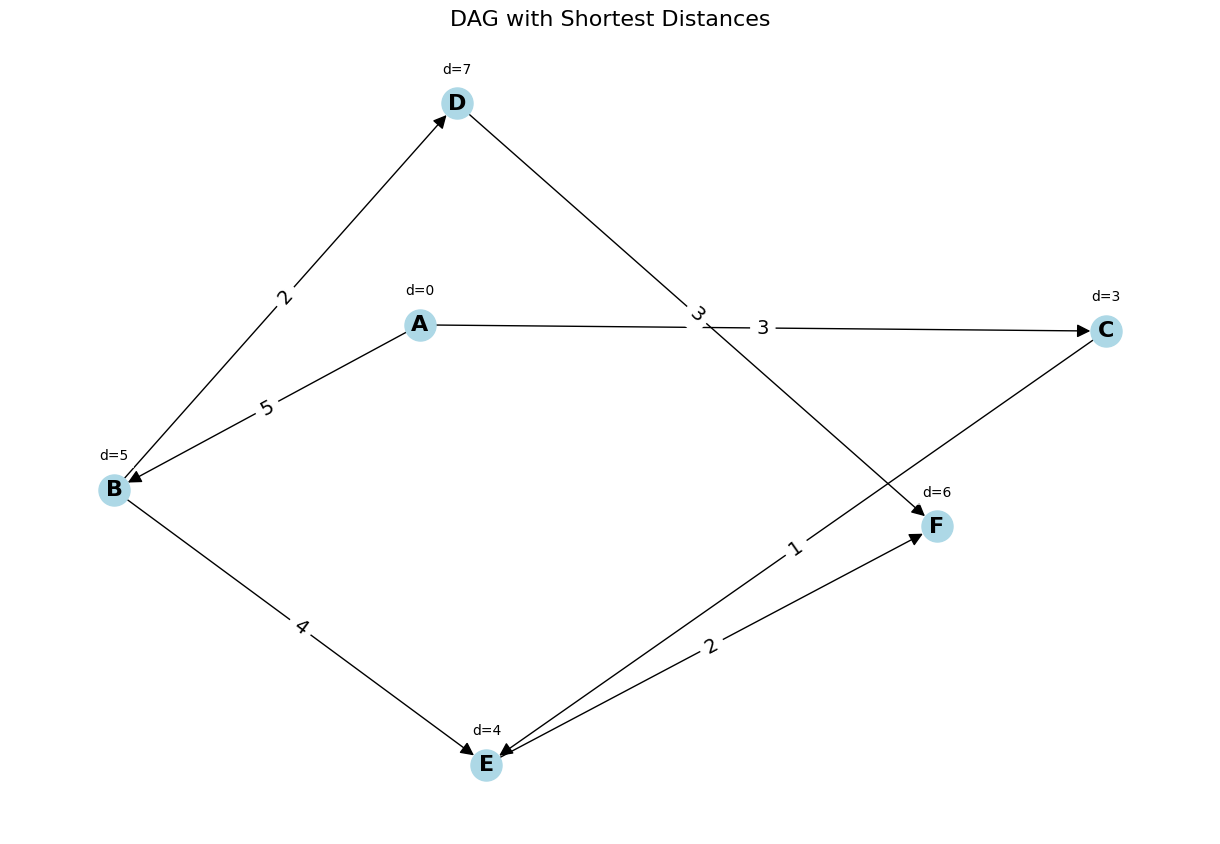

Shortest paths:
B: A -> B
C: A -> C
D: A -> B -> D
E: A -> C -> E
F: A -> C -> E -> F


In [21]:
def DAG_relaxation(graph, weights, source):
    order = topological_sort(graph)
    D = {v: float('inf') for v in graph}
    parents = {v: None for v in graph}
    D[source] = 0
    parents[source] = source

    for u in order:
        for v in graph[u]:
            if D[v] > D[u] + weights[(u, v)]:
                D[v] = D[u] + weights[(u, v)]
                parents[v] = u

    return D, parents


# Graph definition
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'A': 4, 'C': 1, 'D': 5},
    'C': {'A': 2, 'B': 1, 'D': 8, 'E': 10},
    'D': {'B': 5, 'C': 8, 'E': 2, 'F': 6},
    'E': {'C': 10, 'D': 2, 'F': 3},
    'F': {'D': 6, 'E': 3}
}

source = 'A'

# visualize topological_sort
order = topological_sort(graph)
print(order)

# Run the algorithm
distances, parents = DAG_relaxation(graph, weights, source)

# Create a directed graph
G = nx.DiGraph()

# Add edges with weights
for (u, v), weight in weights.items():
    G.add_edge(u, v, weight=weight)

# Set up the plot
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=500, arrowsize=20, font_size=16, font_weight='bold')

# Add edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=14)

# Add distance labels
for node, distance in distances.items():
    x, y = pos[node]
    plt.text(x, y+0.1, f'd={distance}', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# Show the plot
plt.title("DAG with Shortest Distances", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

# Print shortest paths
print("Shortest paths:")
for vertex in graph:
    if vertex != source:
        path = []
        current = vertex
        while current != source:
            path.append(current)
            current = parents[current]
        path.append(source)
        print(f"{vertex}: {' -> '.join(reversed(path))}")